In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [7]:
lb = load_boston()
dir(lb)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [24]:
df = pd.DataFrame(lb['data'], columns=lb['feature_names'])
df['price'] = lb['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
Q1 = df.quantile(0.25)
Q1

CRIM         0.082045
ZN           0.000000
INDUS        5.190000
CHAS         0.000000
NOX          0.449000
RM           5.885500
AGE         45.025000
DIS          2.100175
RAD          4.000000
TAX        279.000000
PTRATIO     17.400000
B          375.377500
LSTAT        6.950000
price       17.025000
Name: 0.25, dtype: float64

In [18]:
Q3 = df.quantile(0.75)
Q3

CRIM         3.677083
ZN          12.500000
INDUS       18.100000
CHAS         0.000000
NOX          0.624000
RM           6.623500
AGE         94.075000
DIS          5.188425
RAD         24.000000
TAX        666.000000
PTRATIO     20.200000
B          396.225000
LSTAT       16.955000
price       25.000000
Name: 0.75, dtype: float64

In [19]:
iqr = Q3 - Q1
iqr

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
price        7.975000
dtype: float64

In [30]:
outlayer_bawah = Q1 - 1.5 * iqr
outlayer_bawah

CRIM        -5.310511
ZN         -18.750000
INDUS      -14.175000
CHAS         0.000000
NOX          0.186500
RM           4.778500
AGE        -28.550000
DIS         -2.532200
RAD        -26.000000
TAX       -301.500000
PTRATIO     13.200000
B          344.106250
LSTAT       -8.057500
price        5.062500
dtype: float64

In [31]:
outlayer_atas = Q3 + 1.5 * iqr
outlayer_atas

CRIM          9.069639
ZN           31.250000
INDUS        37.465000
CHAS          0.000000
NOX           0.886500
RM            7.730500
AGE         167.650000
DIS           9.820800
RAD          54.000000
TAX        1246.500000
PTRATIO      24.400000
B           427.496250
LSTAT        31.962500
price        36.962500
dtype: float64

In [32]:
inlayers_bottom = df[df>outlayer_bawah]
inlayers_bottom

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,NaN,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,NaN,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,NaN,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,NaN,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,NaN,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,NaN,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,NaN,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,NaN,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [33]:
inlayers = inlayers_bottom[inlayers_bottom<outlayer_atas]
inlayers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,NaN,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,NaN,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,NaN,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,NaN,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,NaN,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,NaN,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,NaN,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,NaN,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [35]:
inlayers['CHAS'] = inlayers['CHAS'].fillna(0)
inlayers



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [37]:
inlayers.isnull().sum()

CRIM       66
ZN         68
INDUS       0
CHAS        0
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
price      40
dtype: int64

In [40]:
inlayers= inlayers.dropna()
inlayers

inlayers.count()

CRIM       288
ZN         288
INDUS      288
CHAS       288
NOX        288
RM         288
AGE        288
DIS        288
RAD        288
TAX        288
PTRATIO    288
B          288
LSTAT      288
price      288
dtype: int64

In [51]:
inlayers.corr()['price'].sort_values()

LSTAT     -0.670293
AGE       -0.455836
INDUS     -0.428978
NOX       -0.427385
TAX       -0.359987
CRIM      -0.328228
PTRATIO   -0.297836
RAD       -0.187982
B          0.105149
ZN         0.170712
DIS        0.261787
RM         0.660472
price      1.000000
CHAS            NaN
Name: price, dtype: float64

In [47]:
cols = inlayers.columns
cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [49]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

In [53]:
dfSS = pd.DataFrame(preprocessing.scale(inlayers), columns=cols)
dfSS

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,-0.527185,1.664457,-1.349224,0.0,0.010460,0.929372,-0.070046,0.076882,-0.902191,-0.469431,-1.987254,0.707109,-1.320184,0.533592
1,-0.516632,-0.446502,-0.586313,0.0,-0.679901,0.577435,0.450234,0.584447,-0.755642,-0.851841,-0.548663,0.707109,-0.557661,0.023822
2,-0.516642,-0.446502,-0.586313,0.0,-0.679901,2.323406,-0.225750,0.584447,-0.755642,-0.851841,-0.548663,0.342010,-1.494318,2.806317
3,-0.514088,-0.446502,-1.370059,0.0,-0.789959,1.896054,-0.806793,1.218166,-0.609094,-0.993474,-0.030770,0.503479,-1.694114,2.530192
4,-0.495647,-0.446502,-1.370059,0.0,-0.789959,2.236564,-0.487789,1.218166,-0.609094,-0.993474,-0.030770,0.707109,-1.256030,3.124923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-0.498875,-0.446502,0.192625,0.0,0.360644,0.970507,0.078063,-0.855613,-0.902191,-0.632309,1.292734,0.266658,-0.460513,0.193745
284,-0.507603,-0.446502,0.192625,0.0,0.360644,-0.110440,0.366686,-0.966200,-0.902191,-0.632309,1.292734,0.707109,-0.568659,-0.188583
285,-0.499815,-0.446502,0.192625,0.0,0.360644,1.845778,0.909751,-1.035642,-0.902191,-0.632309,1.292734,0.707109,-1.199207,0.512351
286,-0.475266,-0.446502,0.192625,0.0,0.360644,1.429853,0.845191,-0.907521,-0.902191,-0.632309,1.292734,0.397627,-1.045236,0.108783


In [64]:
xtrain = dfSS[['LSTAT','RM','AGE','INDUS','NOX']]
xtrain

,LSTAT,RM,AGE,INDUS,NOX
0,-1.320184,0.929372,-0.070046,-1.349224,0.010460
1,-0.557661,0.577435,0.450234,-0.586313,-0.679901
2,-1.494318,2.323406,-0.225750,-0.586313,-0.679901
3,-1.694114,1.896054,-0.806793,-1.370059,-0.789959
4,-1.256030,2.236564,-0.487789,-1.370059,-0.789959
...,...,...,...,...,...
283,-0.460513,0.970507,0.078063,0.192625,0.360644
284,-0.568659,-0.110440,0.366686,0.192625,0.360644
285,-1.199207,1.845778,0.909751,0.192625,0.360644
286,-1.045236,1.429853,0.845191,0.192625,0.360644


In [79]:
clustering = AgglomerativeClustering(n_clusters = 3).fit(xtrain)
clus = clustering.labels_
clus

array([0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2], dtype=int64)

In [78]:
dfSS['Cluster'] = clus
dfSS

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,Cluster
0,-0.527185,1.664457,-1.349224,0.0,0.010460,0.929372,-0.070046,0.076882,-0.902191,-0.469431,-1.987254,0.707109,-1.320184,0.533592,0
1,-0.516632,-0.446502,-0.586313,0.0,-0.679901,0.577435,0.450234,0.584447,-0.755642,-0.851841,-0.548663,0.707109,-0.557661,0.023822,2
2,-0.516642,-0.446502,-0.586313,0.0,-0.679901,2.323406,-0.225750,0.584447,-0.755642,-0.851841,-0.548663,0.342010,-1.494318,2.806317,0
3,-0.514088,-0.446502,-1.370059,0.0,-0.789959,1.896054,-0.806793,1.218166,-0.609094,-0.993474,-0.030770,0.503479,-1.694114,2.530192,0
4,-0.495647,-0.446502,-1.370059,0.0,-0.789959,2.236564,-0.487789,1.218166,-0.609094,-0.993474,-0.030770,0.707109,-1.256030,3.124923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-0.498875,-0.446502,0.192625,0.0,0.360644,0.970507,0.078063,-0.855613,-0.902191,-0.632309,1.292734,0.266658,-0.460513,0.193745,0
284,-0.507603,-0.446502,0.192625,0.0,0.360644,-0.110440,0.366686,-0.966200,-0.902191,-0.632309,1.292734,0.707109,-0.568659,-0.188583,2
285,-0.499815,-0.446502,0.192625,0.0,0.360644,1.845778,0.909751,-1.035642,-0.902191,-0.632309,1.292734,0.707109,-1.199207,0.512351,0
286,-0.475266,-0.446502,0.192625,0.0,0.360644,1.429853,0.845191,-0.907521,-0.902191,-0.632309,1.292734,0.397627,-1.045236,0.108783,0


In [92]:
Clustering0 = dfSS[dfSS['Cluster']==0]
Clustering1 = dfSS[dfSS['Cluster']==1]
Clustering2 = dfSS[dfSS['Cluster']==2]
Clustering0

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,Cluster
0,-0.527185,1.664457,-1.349224,0.0,0.010460,0.929372,-0.070046,0.076882,-0.902191,-0.469431,-1.987254,0.707109,-1.320184,0.533592,0
2,-0.516642,-0.446502,-0.586313,0.0,-0.679901,2.323406,-0.225750,0.584447,-0.755642,-0.851841,-0.548663,0.342010,-1.494318,2.806317,0
3,-0.514088,-0.446502,-1.370059,0.0,-0.789959,1.896054,-0.806793,1.218166,-0.609094,-0.993474,-0.030770,0.503479,-1.694114,2.530192,0
4,-0.495647,-0.446502,-1.370059,0.0,-0.789959,2.236564,-0.487789,1.218166,-0.609094,-0.993474,-0.030770,0.707109,-1.256030,3.124923,0
5,-0.515355,-0.446502,-1.370059,0.0,-0.789959,0.598003,-0.316894,1.218166,-0.609094,-0.993474,-0.030770,0.457729,-1.278026,1.531892,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1.316564,-0.446502,1.181524,0.0,0.460696,0.328338,-0.575135,0.019997,2.468432,2.150786,0.832385,-0.035648,-0.293711,-0.061140,0
271,1.900756,-0.446502,1.181524,0.0,0.460696,-0.601780,-0.525765,-0.465752,2.468432,2.150786,0.832385,-0.071530,-0.134241,-0.188583,0
283,-0.498875,-0.446502,0.192625,0.0,0.360644,0.970507,0.078063,-0.855613,-0.902191,-0.632309,1.292734,0.266658,-0.460513,0.193745,0
285,-0.499815,-0.446502,0.192625,0.0,0.360644,1.845778,0.909751,-1.035642,-0.902191,-0.632309,1.292734,0.707109,-1.199207,0.512351,0


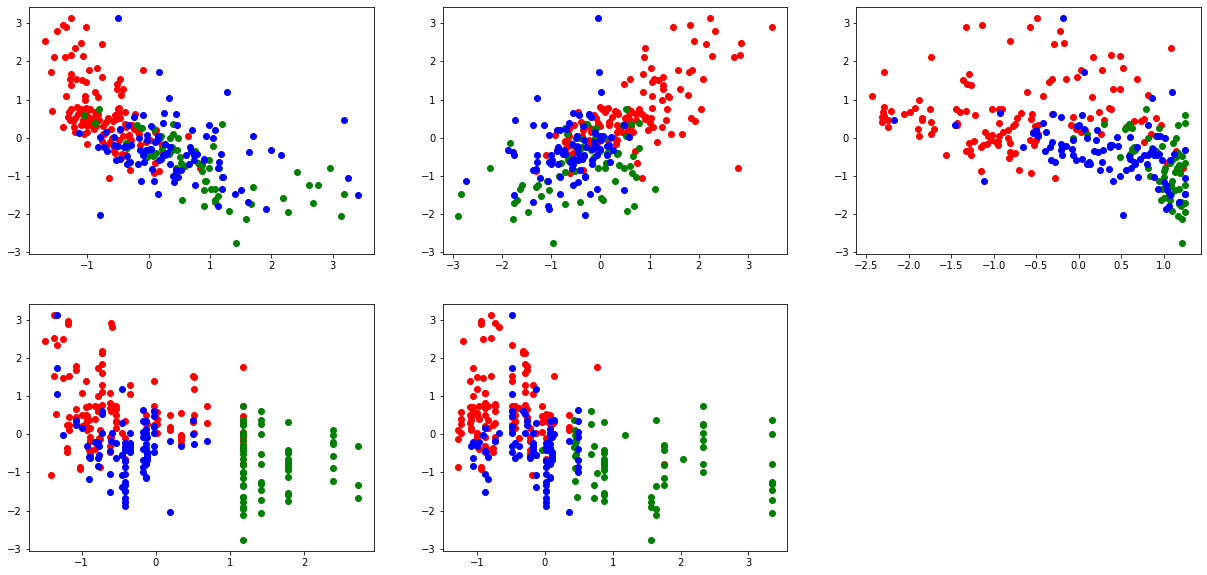

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21,10))
plt.subplot(231)
plt.plot(Clustering0['LSTAT'],Clustering0['price'],'ro')
plt.plot(Clustering1['LSTAT'],Clustering1['price'],'go')
plt.plot(Clustering2['LSTAT'],Clustering2['price'],'bo')

plt.subplot(232)
plt.plot(Clustering0['RM'],Clustering0['price'],'ro')
plt.plot(Clustering1['RM'],Clustering1['price'],'go')
plt.plot(Clustering2['RM'],Clustering2['price'],'bo')

plt.subplot(233)
plt.plot(Clustering0['AGE'],Clustering0['price'],'ro')
plt.plot(Clustering1['AGE'],Clustering1['price'],'go')
plt.plot(Clustering2['AGE'],Clustering2['price'],'bo')

plt.subplot(234)
plt.plot(Clustering0['INDUS'],Clustering0['price'],'ro')
plt.plot(Clustering1['INDUS'],Clustering1['price'],'go')
plt.plot(Clustering2['INDUS'],Clustering2['price'],'bo')

plt.subplot(235)
plt.plot(Clustering0['NOX'],Clustering0['price'],'ro')
plt.plot(Clustering1['NOX'],Clustering1['price'],'go')
plt.plot(Clustering2['NOX'],Clustering2['price'],'bo')
